# Logistic Regression On IRIS Dataset

The Iris data set is a classification dataset that contains three classes of 50 instances each, where each class refers to a type of iris plant. The three classes in the Iris dataset are:

1. Setosa
2. Versicolor
3. Virginica 

We are going to employ the services of the Logistic Regression Model on the Iris Dataset to predict the species of the flower. 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
#Import the IRIS dataset
data = pd.read_csv('iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [31]:
#Split the dependent and independent variable
x = data.iloc[:,[0,1,2,3]].values
y = data.iloc[:,4].values

In [32]:
#Split the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()
X_train = object.fit_transform(X_train)
X_test = object.transform(X_test)

In [34]:
#Apply Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42,solver='lbfgs',multi_class='auto')
lr.fit(X_train,y_train)
y_pre = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)
y_prob = np.round(y_prob,2)

In [35]:
#Prediction
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<10}" . format("y_test","y_pred","Setosa", "Versicolor", "Virginica \n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pre, y_prob[:,0], y_prob[:,1], y_prob[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa     | Versicolor    | Virginica 
-----------------------------------------------------------------
Versicolor | Versicolor | 0.01       | 0.86          | 0.13      
Setosa     | Setosa     | 0.97       | 0.03          | 0.0       
Virginica  | Virginica  | 0.0        | 0.0           | 1.0       
Versicolor | Versicolor | 0.01       | 0.74          | 0.25      
Versicolor | Versicolor | 0.0        | 0.73          | 0.27      
Setosa     | Setosa     | 0.94       | 0.06          | 0.0       
Versicolor | Versicolor | 0.09       | 0.87          | 0.04      
Virginica  | Virginica  | 0.0        | 0.06          | 0.94      
Versicolor | Versicolor | 0.0        | 0.63          | 0.37      
Versicolor | Versicolor | 0.03       | 0.92          | 0.05      
Virginica  | Virginica  | 0.0        | 0.19          | 0.81      
Setosa     | Setosa     | 0.95       | 0.05          | 0.0       
Setosa     | Setosa     | 0.96       | 0.04          | 0.0       
Setosa    

In [36]:
from sklearn.metrics import accuracy_score
print("Accuracy Score - %.3f " %accuracy_score(y_test,y_pre))

Accuracy Score - 1.000 


In [37]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pre)
print(con)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


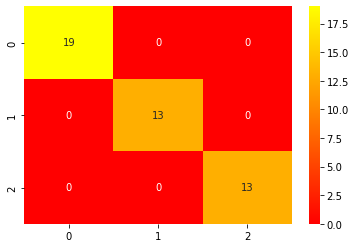

In [38]:
#Plot them to understand better
ax = plt.axes()
sns.heatmap(con,annot=True,fmt='d',cmap="autumn",axes=ax)
plt.show()